## TO DO
- [ ] Treinar um modelo, gerar novos dados apenas com volume e vazão diferentes, ver o desempenho
- [ ] Diferentes situações:
    - [ ] reação inversa
    - [ ] adiabática
- [ ] Ver quanto tempo demora pra atingir o estado estacionário (provavelmente algumas amostras só)

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
history = History()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# data = pd.read_csv('../data/data_Ea83680_k026000000000.0_V0.2.csv', index_col=0)
data = pd.read_csv('../data/data_Ea83680_k026000000000.0_V0.2_K2.csv', index_col=0)
V = 0.2

In [24]:
x_cols = ['Cae', 'Cbe', 'T']
y_col = ['Cc']

minmax = MinMaxScaler()
in_data = minmax.fit_transform(data[x_cols].to_numpy())

X_train, X_test, Y_train, Y_test = train_test_split(in_data, data[y_col].to_numpy(), test_size=.2, )
Y_test = Y_test.reshape(Y_test.shape[0])
Y_train = Y_train.reshape(Y_train.shape[0])

print(f'x train: {X_train.shape}, x test: {X_test.shape}')
print(f'y train: {Y_train.shape}, y test: {Y_test.shape}')

x train: (8000, 3), x test: (2000, 3)
y train: (8000,), y test: (2000,)


In [25]:
model = Sequential()
model.add(Dense(15, input_dim=X_train.shape[1], activation='exponential'))
model.add(Dense(7, activation='sigmoid', ))
model.add(Dense(3, activation='exponential'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=50, verbose=1, callbacks=[history])

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 4279891.5000
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 3347652.2500
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 19403.4629
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 6533.0605
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 2767.0627
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 2059.9624
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 1575.7644
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 1053.4073
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 428.4873
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 264.4437
Epoch 11/50
250/250 [==============================] - 0s 1ms/step - loss: 216.4109
Epoch 12/50
250/250 [==============================] - 0s 2ms/step - l

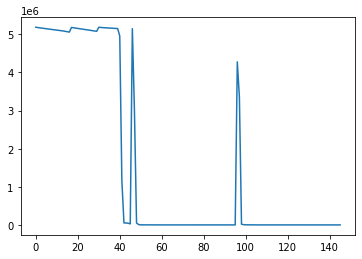

In [26]:
plt.plot(history.history['loss'])

In [27]:
Y_hat_train = model.predict(X_train)
Y_hat_train = Y_hat_train.reshape(Y_hat_train.shape[0],)
Y_hat_test = model.predict(X_test)
Y_hat_test = Y_hat_test.reshape(Y_hat_test.shape[0],)

In [28]:
mse(Y_train, Y_hat_train), mse(Y_test, Y_hat_test)

(23.022674970540926, 24.50493404469562)

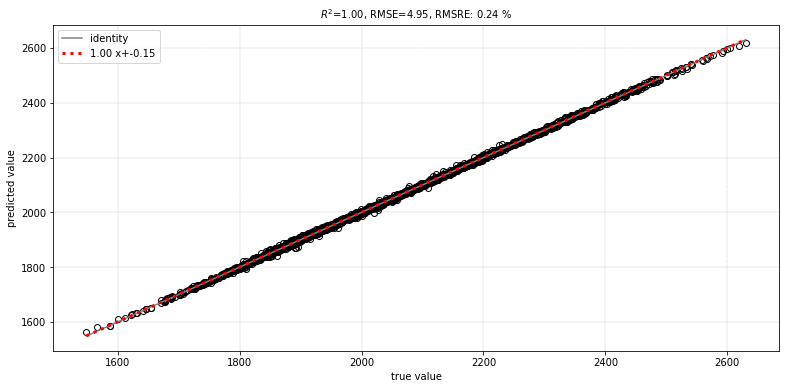

In [29]:
plot_identity_graphic(Y_test, Y_hat_test)

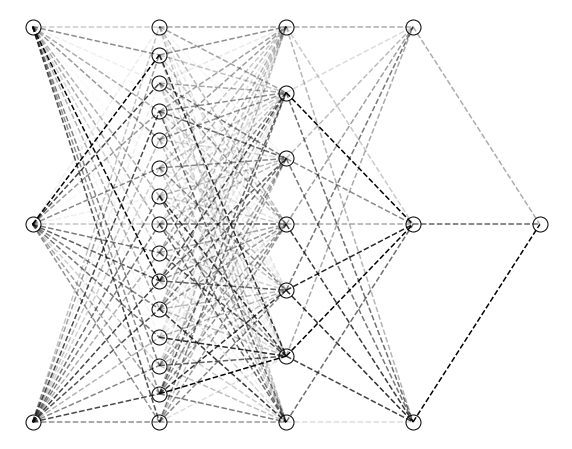

In [30]:
plot_rnn_keras(model)

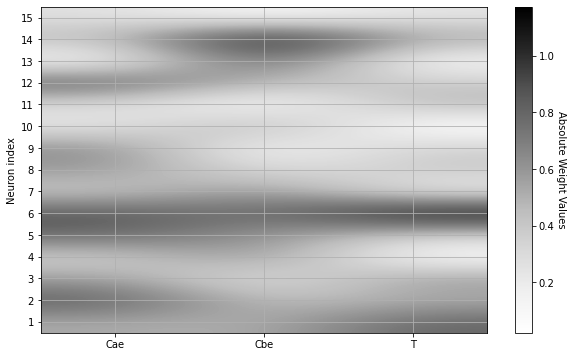

In [31]:
plot_first_layer_keras(model, label=x_cols)